# Determining Age with Computer Vision

The goal of this project is to determine the age of clients based on images of their face. Unlike some other projects in this collection of student work, the purpose of this project was very much to understand the mechanics of CV and of working with neural networks. As such, conclusions are limited and the chosen approach is more strictly defined by the requirements of the project.


This project was done with remote access to a dataset that I do not have access to locally. The images themselves are available online from ChaLearn, but because the data was organized/stored in a significantly different manner, I needed to approach certain parts of the project differently.

### Импорты

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image

### Просмотр фотографий из датасета

In [ ]:
labels = pd.read_csv('/datasets/faces/labels.csv')

In [ ]:
def display_first_15():
    
    for i in range(0, 9):
        img = Image.open(f'/datasets/faces/final_files/00000{i}.jpg').resize((150, 150))
        label = labels['real_age'][i]
        print(label)
        display(img)
        
    for i in range(10, 15):
        img = Image.open(f'/datasets/faces/final_files/0000{i}.jpg').resize((150, 150))
        label = labels['real_age'][i]
        print(label)
        display(img)

In [ ]:
display_first_15()

##### In the following cell, I used a datagenerator to display a sample of the photographs used. However, due to the fact that I don't have access to the dataset, the datagenerator cannot access the necessary files to function.


##### Below this I have included a more naive approach that will function with either the remote dataset or with the downloaded dataset that I had access to.

In [ ]:
show_15 = ImageDataGenerator(rescale=1./255)
show_15_flow = show_15.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=15,
        class_mode='raw',
        seed=12345) 

imgs, lbls = next(show_15_flow)

for img, lbl in zip(imgs, lbls):
    print(lbl)
    display(Image.open(f'/datasets/faces/final_files/{img}').resize((150, 150)))

In [ ]:
print(f'Количество фотографий в датасете: {len(labels)}')
labels.hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()
print('\n')
labels.boxplot(column='real_age')
plt.ylabel('Age')
plt.show()

In [2]:
try:
    labels = pd.read_csv('/datasets/faces/labels.csv')

except:
    labels = pd.read_csv('datasets/appa-real-release/gt_avg_train.csv')
    labels = labels[['file_name', 'real_age']]


labels.info()
display(labels.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  4113 non-null   object
 1   real_age   4113 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 64.4+ KB


,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


Отмечается, что датасет в хорошем состоянии, без каких-либо пропусков.

Также посмотрел на целую таблицу; там написано разное, в том числе число запрошенных людей о предполагаемом возрасте людей в фотографиях. Интересно то, что количество, как мне кажется, сравнительно маленькое. Мы тут используем только настоящий возраст, так что для нас это не важно.

4


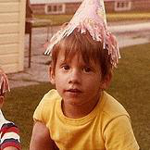

18


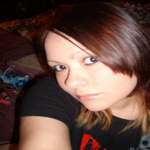

80


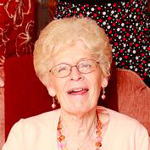

50


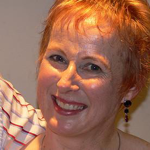

17


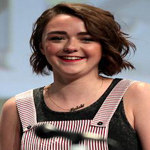

27


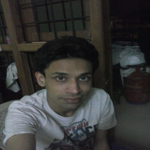

24


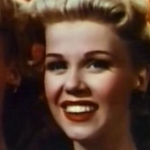

43


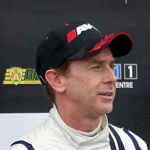

26


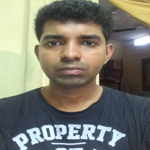

17


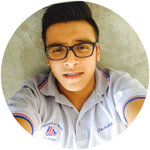

51


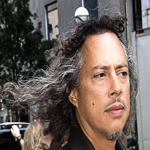

2


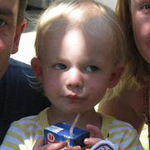

1


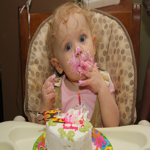

6


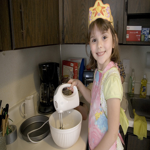

In [3]:
try:
    def display_first_15():
    
        for i in range(0, 9):
            img = Image.open(f'/datasets/faces/final_files/00000{i}.jpg').resize((150, 150))
            label = labels['real_age'][i]
            print(label)
            display(img)

        for i in range(10, 15):
            img = Image.open(f'/datasets/faces/final_files/0000{i}.jpg').resize((150, 150))
            label = labels['real_age'][i]
            print(label)
            display(img)

    display_first_15()

except:
    def display_first_15():
    
        for i in range(0, 9):
            img = Image.open(f'datasets/appa-real-release/train/00000{i}.jpg').resize((150, 150))
            label = labels['real_age'][i]
            print(label)
            display(img)

        for i in range(10, 15):
            img = Image.open(f'datasets/appa-real-release/train/0000{i}.jpg').resize((150, 150))
            label = labels['real_age'][i]
            print(label)
            display(img)
            
    display_first_15()

Количество фотографий в датасете: 4113


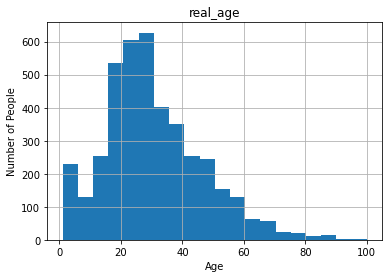

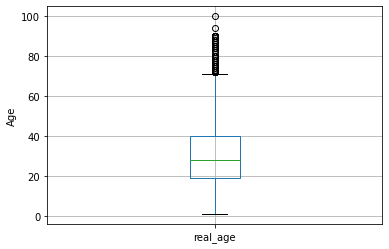

In [5]:
print(f'Количество фотографий в датасете: {len(labels)}')
labels.hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()
print('\n')
labels.boxplot(column='real_age')
plt.ylabel('Age')
plt.show()

#### N.B. I wrote the following conclusions based on the version of this project realized with access to the remote dataset; as such, it is possible that the conclusions may seem not to correspond perfectly to the information above.


### Выводы о фотографиях в датасете

Просмотр фотографий в датасете не показался необходимым этапом для строения модели, но зато он оказался очень информативным в плане понимании тренирования и работы модели. Под этим я имею в виду, что фотографии тут самые разные. Они различаются в качестве, в размере, в освещении, в скадрировании, в ракурсе, в цветовой палитре, в старости фотографии (что высказвается не только на фотографию саму, но и на стиль макияжа и т.д.) – одним словом, фотографии самые разные как только могут быть.

Всё это показывает, что с одной стороны у модели задача будет не из лёгких, а с другой, что тренирование с такой разновидностью данных должно обеспечить модели определённый уровень устойчивости, когда она будет использована для предсказывания.

### Выводы о датасете

Датасет не настолько большой – в нём всего 7591 фотографий. Для нашей цели, то есть учебной, это вполне достаточно. Однако кажется, что для обработки модели для использования, было бы лучше использовать датасет по больше. К тому же, желательно было бы использовать фотографии, которые похожи на изображения, для которых модель будет применена. Например, если изображения будут из камеры за кассой, то ракурс будет примерно такой же каждый раз, когда модель должна будет предсказывать возраст. К тому же, часто бывает, что люди ходят за покупками вместе, а этот датасет не соответствует той реалии, ибо на каждой фотографии изображен только один человек. Похожая проблема то, что в супермаркетах часто встречаются рекламные плакаты, на которых изображены люди. Это возможно окажется проблемой для модели при предсказывании.

Распределение возрастов в датасете нормальное. Больше всего есть люди молодого/среднего возраста, а как возраст увеличивается, количество фотографий/людей уменьшается. После семидесяти, количество людей значительно уменьшается; такие люди в этом датасете – статистические выбросы. Это логично по жизни, но для того, чтобы создать модель для использования в супермаркете, было бы логичнее использовать фотографии более соответствующие возрасту покупателей. Например, наверно можно обойтись без фотографий людей, которым меньше десяти. Также, хотя это не поможет с задачей о предложениях покупателям товаров им интересующихся, для задачи связанной с продажи алкоголя, было бы логично использовать много фотографий людей, которым около 18, поскольку именно для этой группы точность важна (то есть, если модель ошибается на 7 лет для покупателя, которому 43, это не имеет значения для продажи алкоголя, но когда покупателю около 18, наоборот ошибочность имеет значение).

### Подготовка и загрузка данных

In [ ]:
optim = Adam(learning_rate=0.00005)

In [ ]:
def load_train(path):
    
    train_datagen = ImageDataGenerator(validation_split=0.25, 
                                       horizontal_flip=True, 
                                       vertical_flip=True, 
                                       rescale=1./255)
    
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path+'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)
    
    return train_gen_flow

In [ ]:
def load_test(path):
    
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path+'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)
    
    return test_gen_flow

In [ ]:
def create_model(input_shape):
    
    backbone = ResNet50(input_shape=input_shape,
                       weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                       include_top=False)
    
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=1, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer=optim, metrics=['mae'])
    
    return model

In [ ]:
def train_model(model, train_data, test_data, batch_size=32, epochs=10, steps_per_epoch=None, validation_steps=None):
    
    model.fit(train_data, validation_data=test_data, 
              batch_size=None, epochs=epochs, steps_per_epoch=steps_per_epoch, 
              validation_steps=validation_steps, verbose=2, shuffle=False)
    
    return model

### Результаты

2022-07-18 11:00:16.550427: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6

2022-07-18 11:00:16.758008: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.

2022-07-18 11:00:21.488255: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1

2022-07-18 11:00:22.162934: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s

2022-07-18 11:00:22.163025: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1

2022-07-18 11:00:22.163058: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10

2022-07-18 11:00:22.238158: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10

2022-07-18 11:00:22.263806: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10

2022-07-18 11:00:22.589628: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10

2022-07-18 11:00:22.626821: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10

2022-07-18 11:00:22.626918: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7

2022-07-18 11:00:22.631314: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0

2022-07-18 11:00:22.631677: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA

2022-07-18 11:00:22.681476: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2099995000 Hz

2022-07-18 11:00:22.684438: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55aadf0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:

2022-07-18 11:00:22.684469: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version

2022-07-18 11:00:22.911655: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5630e10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:

2022-07-18 11:00:22.911691: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0

2022-07-18 11:00:22.914102: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s

2022-07-18 11:00:22.914160: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1

2022-07-18 11:00:22.914170: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10

2022-07-18 11:00:22.914198: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10

2022-07-18 11:00:22.914208: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10

2022-07-18 11:00:22.914217: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10

2022-07-18 11:00:22.914226: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10

2022-07-18 11:00:22.914233: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7

2022-07-18 11:00:22.918648: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0

2022-07-18 11:00:22.923110: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1

2022-07-18 11:00:26.302588: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:

2022-07-18 11:00:26.302636: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 

2022-07-18 11:00:26.302645: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 

2022-07-18 11:00:26.308926: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 30509 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
  
Train for 178 steps, validate for 60 steps

Epoch 1/10
2022-07-18 11:00:51.267899: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-07-18 11:00:53.534851: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 72s - loss: 358.8568 - mae: 14.0058 - val_loss: 594.7521 - val_mae: 19.3746

Epoch 2/10
178/178 - 38s - loss: 106.5403 - mae: 7.8364 - val_loss: 807.6296 - val_mae: 23.4766

Epoch 3/10
178/178 - 38s - loss: 81.9388 - mae: 6.8176 - val_loss: 249.8362 - val_mae: 12.2909

Epoch 4/10
178/178 - 38s - loss: 62.4524 - mae: 5.9791 - val_loss: 181.5701 - val_mae: 10.6852

Epoch 5/10
178/178 - 38s - loss: 50.3981 - mae: 5.3706 - val_loss: 120.1188 - val_mae: 8.1908

Epoch 6/10
178/178 - 38s - loss: 45.4132 - mae: 5.0798 - val_loss: 90.5442 - val_mae: 6.9501

Epoch 7/10
178/178 - 38s - loss: 38.7697 - mae: 4.7121 - val_loss: 90.6762 - val_mae: 6.9659

Epoch 8/10
178/178 - 37s - loss: 35.3718 - mae: 4.4846 - val_loss: 84.8361 - val_mae: 6.8355

Epoch 9/10
178/178 - 38s - loss: 30.5053 - mae: 4.2282 - val_loss: 107.2110 - val_mae: 7.6283

Epoch 10/10
178/178 - 38s - loss: 27.0511 - mae: 3.9484 - val_loss: 81.8008 - val_mae: 6.7075

WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']

60/60 - 9s - loss: 81.8008 - mae: 6.7075

Test MAE: 6.7075

### Выводы

Задача модели заключилась в том, чтобы определять реальный возраст людей в фотографиях. Модель удовлетворительно выполнила задачу.

Итоговый результат на валидационной выборке:

Средняя абсолютная погрешность (MAE): 6.71


Этот результат – хороший. Датасет и задача взята из проекта ChaLearn Looking at People. У них были поставлены две задачи: предсказать настоящий возраст человека в фото и предсказать предположительный возраст человека в фото, то есть то, что другие люди бы подумали. У нас задача была одна – предсказать настоящий возраст. Результат этой модели не сильно выше результата полученного исследователями оригинального проекта ChaLearn; их MAE результат был 5.4, поэтому 6.7 здесь – хороший результат.

В моей модели для увеличения треинировочной выборки, я использовал только вертикальное и горизонтальное отражения (vertical_flip и horizontal_flip), которые были не единственные доступные способы увеличить тренировочную выборку и, тем образом, возможно улучшить итоговый результат. Не обязательно так, что использование других таких методов бы улучшил результат, но тем не менее можно предполагать, что такая возможность (улучшения результата) имеется.

Стоит также добавить, что, посмотрив несколько фотографий датасета, мне стало ясно, что фотографии в датасете далеко не стандартизированные, скорее наоборот – там фото бывают с разных ракурсов, отрезанными, с разных дистанций, и так далее. 

Если бы я собирался продолжить работу над этой задачей, я бы начинал с того, чтобы пробовать разные способы увеличения тренировочной выборки. Также было бы интересно попробовать использовать разные ResNet-ы (ResNet34, ResNet101, и т.д.; в этом проекте я использовал ResNet50) чтобы увидеть, как результаты меняются.